# En este ejercicio vamos a trabajar con un Dataframe.


In [1]:
! # Instalamos el paquete desde el interprete de comandos, porque no se encuentra en el container
! pip install lxml

    100% |████████████████████████████████| 5.7MB 110kB/s eta 0:00:01   10% |███▎                            | 583kB 5.5MB/s eta 0:00:01    19% |██████▍                         | 1.1MB 16.0MB/s eta 0:00:01
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")

df



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,31,24,7,0,79,16,63,79
1,Atlético Madrid,31,20,8,3,51,15,36,68
2,Valencia,31,20,5,6,59,31,28,65
3,Real Madrid,31,19,7,5,77,34,43,64
4,Betis,31,15,4,12,52,53,-1,49
5,Villarreal,31,14,5,12,41,37,4,47
6,Sevilla,31,14,4,13,39,50,-11,46
7,Girona,31,12,8,11,44,48,-4,44
8,Celta,31,12,7,12,50,43,7,43
9,Eibar,31,11,7,13,36,45,-9,40


In [3]:
# Guardar a fichero
df.to_csv("datasets/equipos.csv", encoding='utf-8', index=False)


In [4]:
! pwd
! ls -altr 
! head -3 equipos.csv

/home/jovyan/work/machine-learning/ejercicios
total 488
drwxr-xr-x  3 jovyan users     96 Apr 14 16:41 images
-rw-r--r--  1 jovyan users 253960 Apr 14 16:41 Ejercicio 3 - Dealing with missing data.ipynb
-rw-r--r--  1 jovyan users  18447 Apr 14 16:41 Ejercicio 1 - Soluciones.ipynb
-rw-r--r--  1 jovyan users  49903 Apr 14 16:41 Ejercicio 1 - Primer modelo.ipynb
-rw-r--r--  1 jovyan users  58142 Apr 14 16:41 Ejercicio 0 - Soluciones.ipynb
-rw-r--r--  1 jovyan users  41238 Apr 14 16:41 Ejercicio 0 - Manejo DataFrame.ipynb
drwxr-xr-x  7 jovyan users    224 Apr 14 16:41 datasets
drwxr-xr-x 12 jovyan users    384 Apr 14 16:41 ..
drwxr-xr-x  3 jovyan users     96 Apr 14 17:14 .ipynb_checkpoints
-rw-r--r--  1 jovyan users  58142 Apr 14 17:16 dev-Ejercicio 0 - Soluciones-Copy1.ipynb
drwxr-xr-x 11 jovyan users    352 Apr 14 17:16 .
head: cannot open 'equipos.csv' for reading: No such file or directory


In [5]:
#Coger las columnas
df.columns

Index(['Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS'], dtype='object')

In [6]:
# Coger los dos primeros campos
df.head(2)

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS
0,Barcelona,31,24,7,0,79,16,63,79
1,Atlético Madrid,31,20,8,3,51,15,36,68


In [7]:
# Coger una columna
df.Equipo.tail(5)

15        Alavés
16       Levante
17     Deportivo
18    Las Palmas
19        Málaga
Name: Equipo, dtype: object

In [8]:
# Crear una columna
df["Posicion"] = range(1,21)
df

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Posicion
0,Barcelona,31,24,7,0,79,16,63,79,1
1,Atlético Madrid,31,20,8,3,51,15,36,68,2
2,Valencia,31,20,5,6,59,31,28,65,3
3,Real Madrid,31,19,7,5,77,34,43,64,4
4,Betis,31,15,4,12,52,53,-1,49,5
5,Villarreal,31,14,5,12,41,37,4,47,6
6,Sevilla,31,14,4,13,39,50,-11,46,7
7,Girona,31,12,8,11,44,48,-4,44,8
8,Celta,31,12,7,12,50,43,7,43,9
9,Eibar,31,11,7,13,36,45,-9,40,10


In [9]:
# Coger rango de celdas por su posicion
df.iloc[0:5,0:3]

,Equipo,PJ,PG
0,Barcelona,31,24
1,Atlético Madrid,31,20
2,Valencia,31,20
3,Real Madrid,31,19
4,Betis,31,15


In [10]:
# Seleccionar filas según condiciones
# Coger solo aquellos equipos con mas goles a favor que en contra
df.loc[df['GF'] > df['GC']]


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Posicion
0,Barcelona,31,24,7,0,79,16,63,79,1
1,Atlético Madrid,31,20,8,3,51,15,36,68,2
2,Valencia,31,20,5,6,59,31,28,65,3
3,Real Madrid,31,19,7,5,77,34,43,64,4
5,Villarreal,31,14,5,12,41,37,4,47,6
8,Celta,31,12,7,12,50,43,7,43,9
10,Getafe,31,10,9,12,35,30,5,39,11
12,Real Sociedad,31,10,7,14,56,52,4,37,13


In [11]:
# Primera fila
df.iloc[0]


Equipo      Barcelona
PJ                 31
PG                 24
PE                  7
PP                  0
GF                 79
GC                 16
DIF                63
PTS                79
Posicion            1
Name: 0, dtype: object

In [12]:
# Volcar elemento a dicccionario 
dict = df.iloc[0].to_dict()
print(dict)

{'Equipo': 'Barcelona', 'PJ': 31, 'PG': 24, 'PE': 7, 'PP': 0, 'GF': 79, 'GC': 16, 'DIF': 63, 'PTS': 79, 'Posicion': 1}


In [13]:
# Creamos un nuevo elemento, tambien vía diccionario
# Primero creamos un diccionario
nuevo_equipo = {'Equipo': 'Broncos de Denver',
                'PJ': 1,
                'PG': 0, 
                'PE': 0,
                'PP': 1,
                'GF': 7, 
                'GC': 1, 
                'DIF': 6,
                'PTS': 3
               }


# Creamos un dataframe del dccionario
df_new_team = pd.DataFrame(nuevo_equipo, index=['21',])


df_new_team

,DIF,Equipo,GC,GF,PE,PG,PJ,PP,PTS
21,6,Broncos de Denver,1,7,0,0,1,1,3


In [14]:
# Concatenamos el nuevo diccionario
pd.concat([df, df_new_team], ignore_index=True)

,DIF,Equipo,GC,GF,PE,PG,PJ,PP,PTS,Posicion
0,63,Barcelona,16,79,7,24,31,0,79,1.0
1,36,Atlético Madrid,15,51,8,20,31,3,68,2.0
2,28,Valencia,31,59,5,20,31,6,65,3.0
3,43,Real Madrid,34,77,7,19,31,5,64,4.0
4,-1,Betis,53,52,4,15,31,12,49,5.0
5,4,Villarreal,37,41,5,14,31,12,47,6.0
6,-11,Sevilla,50,39,4,14,31,13,46,7.0
7,-4,Girona,48,44,8,12,31,11,44,8.0
8,7,Celta,43,50,7,12,31,12,43,9.0
9,-9,Eibar,45,36,7,11,31,13,40,10.0


### Ejercicio.
 - Añadir una columna "Posicion", usando la función range,  que tenga la posición numérica del equipo(1 al 20).
 
 - Añadir una columna resultado, que tenga los valores
 
 "Champions League" , para los 4 primeros
 "Europa League"    , Para los 2 siguientes
 "Descenso"         , para los 4 últimos
 "Zona fría"        , para los demas.


In [15]:

df["Resultado"]   =  "Zona fria"

df["Resultado"].iloc[4:6]     = "Europa League"
df["Resultado"].iloc[0:4]     = "Champions League"
df["Resultado"].iloc[16:20]   = "Descenso"
df["Resultado"].iloc[6:16]    = "Zona fria"

df

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Posicion,Resultado
0,Barcelona,31,24,7,0,79,16,63,79,1,Champions League
1,Atlético Madrid,31,20,8,3,51,15,36,68,2,Champions League
2,Valencia,31,20,5,6,59,31,28,65,3,Champions League
3,Real Madrid,31,19,7,5,77,34,43,64,4,Champions League
4,Betis,31,15,4,12,52,53,-1,49,5,Europa League
5,Villarreal,31,14,5,12,41,37,4,47,6,Europa League
6,Sevilla,31,14,4,13,39,50,-11,46,7,Zona fria
7,Girona,31,12,8,11,44,48,-4,44,8,Zona fria
8,Celta,31,12,7,12,50,43,7,43,9,Zona fria
9,Eibar,31,11,7,13,36,45,-9,40,10,Zona fria


In [16]:
df

,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Posicion,Resultado
0,Barcelona,31,24,7,0,79,16,63,79,1,Champions League
1,Atlético Madrid,31,20,8,3,51,15,36,68,2,Champions League
2,Valencia,31,20,5,6,59,31,28,65,3,Champions League
3,Real Madrid,31,19,7,5,77,34,43,64,4,Champions League
4,Betis,31,15,4,12,52,53,-1,49,5,Europa League
5,Villarreal,31,14,5,12,41,37,4,47,6,Europa League
6,Sevilla,31,14,4,13,39,50,-11,46,7,Zona fria
7,Girona,31,12,8,11,44,48,-4,44,8,Zona fria
8,Celta,31,12,7,12,50,43,7,43,9,Zona fria
9,Eibar,31,11,7,13,36,45,-9,40,10,Zona fria


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28960a160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2894641d0>]], dtype=object)

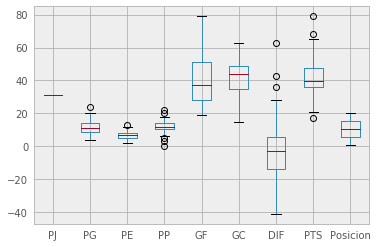

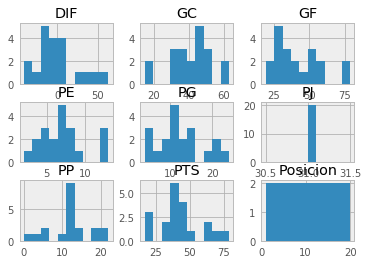

In [19]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
df.boxplot()
df.hist()

LinAlgError: singular matrix

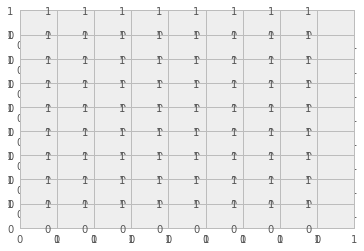